In [8]:
import karateclub as kc
import networkx as nx
import numpy as np

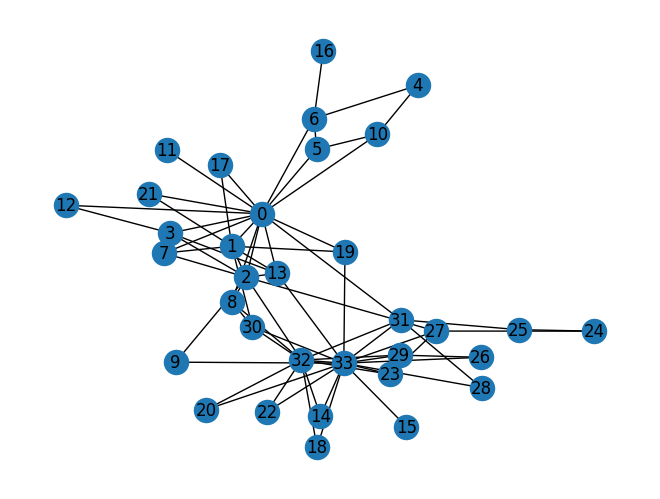

In [9]:
graph = nx.karate_club_graph()
rm_links = [(1, 5), (2, 4), (3, 29), (6, 17), (9, 34), (16, 33), (24, 26), (25, 32)]
graph.remove_edges_from(np.array(rm_links) - 1)
nx.draw(graph, with_labels=True)

In [73]:
deep_walk = kc.DeepWalk(dimensions=20)
deep_walk.fit(graph)
x = deep_walk.get_embedding()
# Get upper triangular indices (unique node pairs)
rows, cols = np.triu_indices(len(x), 1)
# Normalize embeddings
y = x# / np.linalg.norm(x, axis=1)[:,None]
# Compute similarity between all node pairs
dots = (y @ y.T)[rows, cols]
# Get 10 most similar
idxs = np.argsort(dots)[::-1][:10]
# Return links
links = list(zip(rows[idxs] + 1, cols[idxs] + 1))

In [74]:
links

[(5, 7),
 (5, 17),
 (7, 17),
 (5, 11),
 (25, 26),
 (7, 11),
 (5, 6),
 (6, 7),
 (11, 17),
 (6, 17)]